**Exploring the chances of developing cardiovascular disease of the patient**

**Introduction**

Cardiovascular disease (CVD) refers to the variety of health conditions relating to the heart and blood vessels. Coronary artery disease is the most common cardiovascular disease caused by the buildup of cholesterol deposits in the walls of the arteries. The most prominent predictors have been types of chest pain, sex, along with additional factors such as the level of cholesterol, maximum heart rate and ST depression induced by exercise,(Rodgers et al.,  2019). 

In specific, research has shown that the age of the patient is one key predictor, to which older patients are reported to be at higher risk. This discrepancy can be potentially explained by the hormonal change, particularly the loss of estrogen and testosterone (Rodgers et al.,  2019). Additionally, higher cholesterol level are associated to the increase of possible heart attack and stroke, along with the abnormal level of maximum heart rate and severity of chest pain, which are all indicative of an higher risk of experiencing CVD (Jung et al., 2022).

As a result, we can take a closer look into these four factors, to classify whether a patient is at risk of heart disease and answer the question on whether the patient is at high risk of developing cardiovascular disease or not. 

The dataset we will use to try to answer this question is the UCI Machine Learning Repository’s Heart Disease Dataset. This dataset includes information on patients related to their cardiovascular health. Key characteristics in this dataset that will be analyzed include the the predictors mentioned above. 

**Research Question: Which two variables act as the best set of predictors for heart disease?** 


**Preliminary exploratory data**

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

**Download the data**

In the exploratory data phase, the data was downloaded from the website, accomplished thourgh the use of "download.file" and function "read.table".

Then, because the data was presented without proper column names, the function of "colnames" was used to add this missing aspects.

In [2]:
#download and upload the dataset 
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

download_path <- "heart_disease.cleveland.data"

download.file(url = url, destfile = download_path, mode = "wb")

heart_data <- read.table(download_path, header = FALSE, sep = ",")
colnames(heart_data) <- c("age", "sex", "cp", "trestbps","chol", "fbs", "restecg", 
              "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num" )
col_types = list("d", "d", "d", "d", "d", "d", "d", "d", "d", "d", "d", "f", "f", "d")

**Methods**

Moving forward from the acquisition of the raw data, in order to answer the predictive questions, there are many variables from the data that we can use to perform the prediction, however based on our group’s preliminary research, we have decided on four strongest predictors for cardiovascular disease diagnosis. 
As a result, we selected the following columns: age, cp (Value 1 - 4), chol (in mg/dl), thalach (max heart rate) for predictors and num (0 = no diagnosis, 1-4 = possible diagnosis) for the criterion. Some preprocessing we did with the data includes removing the missing values, splitting the data into training and testing sets, as well as grouping the data by diagnosis results.

Moreover, to perform classification, a scatter plot will be used to show the results of the prediction. For instance, we can plot the cholesterol level on the y-axis and maximum heart rate achieved on the x-axis, while color coding each coordinate based on their risk of developing cardiovascular disease (diagnosis). 

**Step 1: Data Wrangling**

After successfully reading the data, the subsequent step involves selecting the desired predictive variables, performed using the function "select". Due to the structure of the raw data, the positive cases were spread out from **num(1-4)**, which is inconvenience to analyze.

To address this issue, the data was mutated and turned into a categorical factor type (fct), in order to separate the positive and negative cases into two categories. This step was performed by specifically creating a variable "diag" and assinge its value to be positive exceeded the number zero **num(> 0)** and negative otherwise.

In [3]:
#cleaned data
heart_tidy <- heart_data|>
                select(thalach, chol, cp, age, num) |> 
                mutate(diagnosis = num > 0) |>
                mutate(diagnosis = as_factor(diagnosis))
heart_tidy

thalach chol cp age num diagnosis
1   150     233  1  63  0   FALSE    
2   108     286  4  67  2   TRUE     
3   129     229  4  67  1   TRUE     
4   187     250  3  37  0   FALSE    
5   172     204  2  41  0   FALSE    
6   178     236  2  56  0   FALSE    
7   160     268  4  62  3   TRUE     
8   163     354  4  57  0   FALSE    
9   147     254  4  63  2   TRUE     
10  155     203  4  53  1   TRUE     
11  148     192  4  57  0   FALSE    
12  153     294  2  56  0   FALSE    
13  142     256  3  56  2   TRUE     
14  173     263  2  44  0   FALSE    
15  162     199  3  52  0   FALSE    
16  174     168  3  57  0   FALSE    
17  168     229  2  48  1   TRUE     
18  160     239  4  54  0   FALSE    
19  139     275  3  48  0   FALSE    
20  171     266  2  49  0   FALSE    
21  144     211  1  64  0   FALSE    
22  162     283  1  58  0   FALSE    
23  160     284  2  58  1   TRUE     
24  173     224  3  58  3   TRUE     
25  132     206  4  60  4   TRUE     
26  158     219  3  50  0   FALSE    
27  172     340  3  58  0   FALSE    
28  114     226  1  66  0   FALSE    
29  171     247  4  43  0   FALSE    
30  114     167  4  40  3   TRUE     
⋮   ⋮       ⋮    ⋮  ⋮   ⋮   ⋮        
274 125     149  4  71  0   FALSE    
275 162     204  1  59  1   TRUE     
276 155     227  1  64  0   FALSE    
277 152     278  3  66  0   FALSE    
278 152     220  3  39  0   FALSE    
279 164     232  2  57  1   TRUE     
280 131     197  4  58  0   FALSE    
281 143     335  4  57  2   TRUE     
282 179     253  3  47  0   FALSE    
283 130     205  4  55  3   TRUE     
284 174     192  2  35  0   FALSE    
285 161     203  4  61  2   TRUE     
286 140     318  4  58  4   TRUE     
287 146     225  4  58  2   TRUE     
288 144     220  2  58  0   FALSE    
289 163     221  2  56  0   FALSE    
290 169     240  2  56  0   FALSE    
291 150     212  3  67  1   TRUE     
292 166     342  2  55  0   FALSE    
293 144     169  4  44  2   TRUE     
294 144     187  4  63  2   TRUE     
295 136     197  4  63  1   TRUE     
296 182     157  2  41  0   FALSE    
297  90     176  4  59  3   TRUE     
298 123     241  4  57  1   TRUE     
299 132     264  1  45  1   TRUE     
300 141     193  4  68  2   TRUE     
301 115     131  4  57  3   TRUE     
302 174     236  2  57  1   TRUE     
303 173     175  3  38  0   FALSE

**Step 2: Spliting data and Creating summary table**

Following preprocessing the data, the next step is to split the data for classification purpose. This task is performed by using the function "initial_split" that  split the data into training and testing set.

Furthermore, a summary table was created to make sure that the diagnosis of positive and negative were balanced.

In [4]:
#split the data into training and testing set
set.seed(2019)
heart_split <- initial_split(heart_tidy, prop = 0.75, strata = num)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

#summary table to have a general sense of diagnosed cases in male and female
heart_sum_table <- heart_train |>
                    group_by(diagnosis) |>
                    summarize(count = n()) |>
                    arrange(-count)
heart_sum_table

diagnosis count
1 FALSE     122  
2 TRUE      103

**Visualization**

Lastly, after making sure the criterion variable is balanced, several graphs were created to visualize the correlation between the predictive variables and the diagnosis of heart disease.

**Age vs Cholesterol Level**

The first graph below shows the correlation between the two predictors while being color coded to represent either TRUE or FALSE diagnosis. In this case, it seems like the age factor shows more impact, which around mid 50 is when there are more clusters of positive diagnosis. Moreover, the cholesterol level seem to have less impact, with the range 200 to 300mg/dl exhibiting most positive cases.

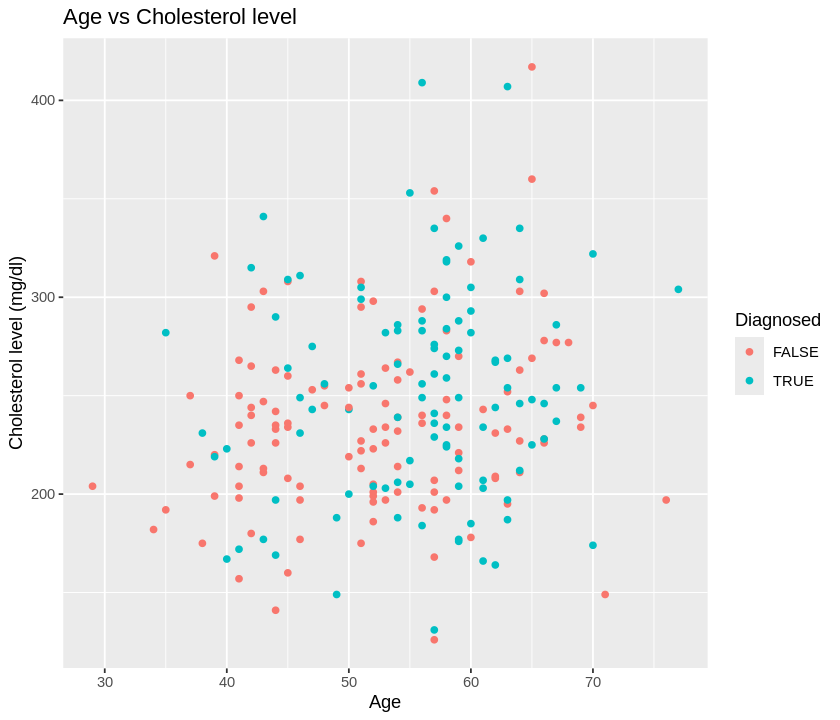

In [5]:
#visualizing some correlation between predictors and the diagnosed cases
set.seed(2019)
options(repr.plot.width = 7, repr.plot.height = 6)

Age_vs_chol_plot <- heart_train |>
                ggplot(aes(x = age, y = chol , color = diagnosis)) +
                geom_point()+
                labs(x = "Age", y = "Cholesterol level (mg/dl)", color = "Diagnosed") +
                ggtitle("Age vs Cholesterol level")
Age_vs_chol_plot


**Age vs Maximum heart rate**

This second graph again shows a rough correlation between the two predictors. Before analyzing, one thing to establish is that a higher value of maximum heart rate usually suggests better fitness capacity, which is indirectly correlated to lower risk of developing heart disease. 

As a result, the graph shows a blur division between higher and lower maximum heart rate achieved. More negative cases can be seen to appear around higher heart rate achieved region, while more positive cases appear around lower heart rate achieved region.

Such a finding aligns with existing literature suggesting a negative association between diagnosis and heart rate. Additionally, the impact of age does not appear prominent based on the graph, however, there is a notable clustering of positive cases around the 50 to 60 years age range.

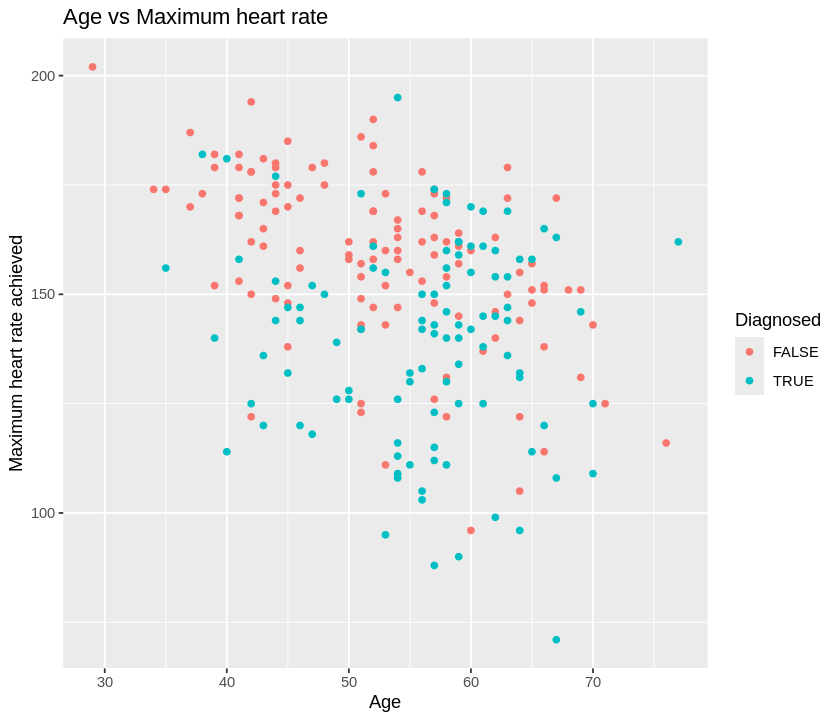

In [24]:
heart_plot2 <- heart_train |>
                ggplot(aes(x = age, y = thalach, color = diagnosis)) +
                geom_point()+
                labs(x = "Age", y = "Maximum heart rate achieved", color = "Diagnosed") +
                ggtitle("Age vs Maximum heart rate")
heart_plot2

**Chest Pain Type**

Moreover, analyzing the chest pain type individually, the following graph presents the four different type of chest pain with the proportion of positive vs negative diagnosis. In this case, the 4th type of chest pain (asymptomatic), which is a pure chest pain type without any other accompanying symptoms, can be considered a strong predictors of potential risk to develop heart disease.

In [8]:
heart_plot3 <- heart_train |>
                ggplot(aes(x = cp, fill = diagnosis))+
                geom_bar(position = "fill")+
                labs(x = "Chest pain type", fill = "Diagnosed")+
                ggtitle("Type of chest pain and diagnosis rates")
heart_plot3


**Age vs Diagnosis**

Lastly, since age seem to be a common predictor in many literatures and always have somehwat effect to the diagnosis results, it is selected and examined individually in the following graphs.

Based on the first histogram, the age impact to diagnosis become clearer, which old age does not necessarily means increase in positive diagnosis,  because the peak seem to be around mid 50s to 60s, then gradually decrease.

However, there might be other underlying reasons behind to explain this phenomenon, such as around the age of mid 50s, people check their health more oftenly compared to even older folks.

In [9]:
heart_plot4 <- heart_train |>
#                filter(diagnosis == TRUE) |> 
                ggplot(aes(x = age, fill = diagnosis)) +
                geom_histogram(position = "stack")+
                labs(x = "Age", fill = "Diagnosed") +
                ggtitle("Age vs Diagnosis")
heart_plot5 <- heart_train |>
#                filter(diagnosis == TRUE) |> 
                ggplot(aes(x = age, fill = diagnosis)) +
                geom_histogram(position = "fill")+
                labs(x = "Age", fill = "Diagnosed") +
                ggtitle("Age vs Diagnosis")
heart_plot4
heart_plot5

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 8 rows containing missing values or values outside the scale range
(`geom_bar()`).”


**Expected outcomes and significance**

Based on previous research, we have discovered that the risk of developing CVD is correlated to the age of the patient, moreover, studies have also shown that abnormal levels of cholesterol are also risk factors for developing CVD (Jung et al., 2022). 
As a result, we expect to find that patients in their 50s and 60s with high levels of cholesterol, or patients who have achieved a low heart rate and exhibit asymptomatic chest pain, are at a higher risk of developing CVD.

Thus, future questions that can be  explored could be what is the threshold of cholesterol levels that puts a patient at most risk of developing cardiovascular disease. 


**Data Analysis**

After examining some relationships between the predictors and criterion, we created three models to examine which of these predictors would produce the highest accuracy.

In the model, age is a stable predictors in all three models, as such the difference in accuracy between models can  be attributed to the variation among changing predictors such as chest pain type, cholesterol level and maximum heart rate achieved. 

The reason we chose age as a stable predictor is because it consistently demonstrates strong impact on positive vs negative diagnosis, also it is a very common predictor of risk for CVS and do not require extra assessment to yield the result. Thus, age is the most applicable predictor in the real world.

**Model 1**

The first model combined all four predictors for the purpose of demonstration that the chosen predictors already yields a high accuracy. Thus, deciding which subset from the four are the most effective can have real world implications of identifying the "best" determinants in predicting higher risk of developing CVD.

**Step 1:**
Finding the best "k" value

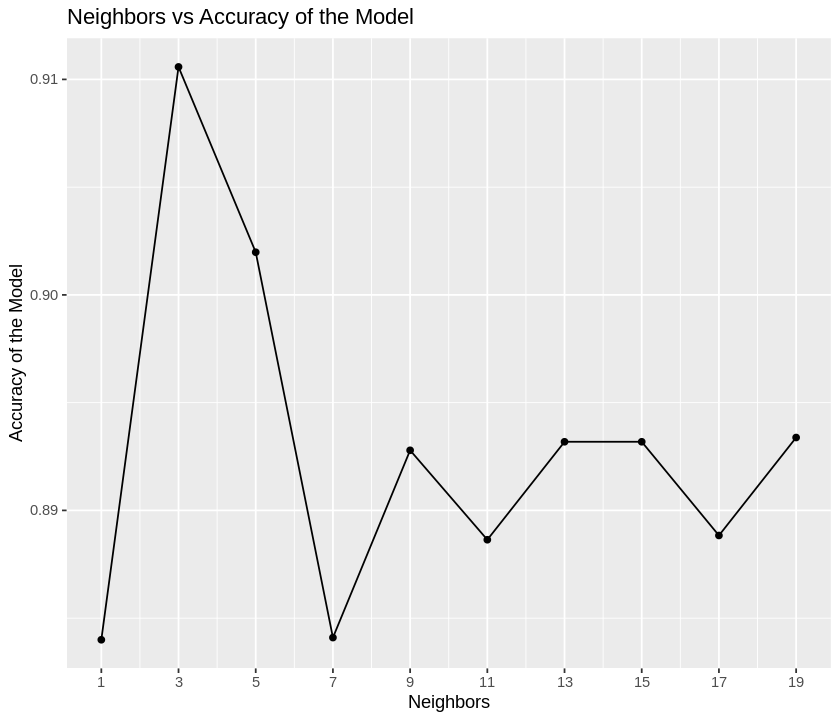

In [10]:
set.seed(2019)
heart_recipe <- recipe(diagnosis ~ ., data = heart_train) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = tune()) |>
                set_engine("kknn") |>
                set_mode("classification")

heart_vfold <- vfold_cv(heart_train, v = 5, strata = diagnosis)
heart_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 2))

heart_fit <- workflow() |>
                add_recipe(heart_recipe) |>
                add_model(heart_spec) |>
                tune_grid(resample = heart_vfold, grid = heart_vals) |>
                collect_metrics()

accuracy_1 <- heart_fit |>
            filter(.metric == "accuracy")

options(repr.plot.width = 7, repr.plot.height = 6)
heart_vals_plot <- accuracy_1 |>
                    ggplot(aes(x = neighbors, y = mean)) +
                    geom_point()+
                    geom_line()+
                    scale_x_continuous(breaks = seq(1, 20, by = 2))+
                    labs(x = "Neighbors", y = "Accuracy of the Model") +
                    ggtitle("Neighbors vs Accuracy of the Model")
heart_vals_plot

**Neighbors vs. Accuracy**

Based on the above plot, setting the number of neighours to K = 5 results in the highest accuracy estimate of ~92%.  Additionally, using K = 5 is the most optimal for us to use since slightly changing this value (ie. +/- 1) will still provide us with a considerably high accuracy, allowing room for uncertainty. Lastly, K = 5 is not too large of a number where it will create a large cost of training. 


**Step 2:**
Fitting the selected "k" value

In [11]:
set.seed(2019)
heart_spec_new <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
                    set_engine("kknn") |>
                    set_mode("classification")
heart_spec_new

heart_fit <- workflow() |>
                add_recipe(heart_recipe) |>
                add_model(heart_spec_new) |>
                fit(data = heart_train)
heart_fit

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 5
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(5,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.09333333
Best kernel: rectangular
Best k: 5

**Step 3:**
Using the selected "k" neighbors to examine the predicsion of the model

In [12]:
set.seed(2019)
heart_predictions <- predict(heart_fit, heart_test) |>
                     bind_cols(heart_test)
heart_accuracy_1 <- heart_predictions |>
                    metrics(truth = diagnosis, estimate = .pred_class) |>
                    select(.metric,.estimate)|>
head(1)                  
heart_accuracy_1

heart_conf_mat <- heart_predictions |>
                     conf_mat(truth = diagnosis, estimate = .pred_class)
heart_conf_mat

.metric  .estimate
1 accuracy 0.9487179

          Truth
Prediction FALSE TRUE
     FALSE    42    4
     TRUE      0   32

**Actual Prediction Test**

In [13]:
heart_predictions_labels <- heart_predictions |>
                            select(.pred_class)|>
                            bind_cols(heart_test |> select(diagnosis)) |>
                            mutate(seq = 1:nrow(heart_predictions)) |>
                            as.data.frame()
heart_match <- heart_predictions_labels|>
                filter(.pred_class == diagnosis)             
heart_match


.pred_class diagnosis seq
1  TRUE        TRUE       1 
2  FALSE       FALSE      3 
3  FALSE       FALSE      4 
4  TRUE        TRUE       5 
5  TRUE        TRUE       6 
6  FALSE       FALSE      7 
7  FALSE       FALSE      8 
8  TRUE        TRUE       9 
9  FALSE       FALSE     10 
10 FALSE       FALSE     11 
11 TRUE        TRUE      12 
12 FALSE       FALSE     14 
13 TRUE        TRUE      15 
14 FALSE       FALSE     16 
15 TRUE        TRUE      17 
16 TRUE        TRUE      18 
17 FALSE       FALSE     19 
18 FALSE       FALSE     20 
19 FALSE       FALSE     21 
20 TRUE        TRUE      22 
21 TRUE        TRUE      23 
22 FALSE       FALSE     24 
23 FALSE       FALSE     25 
24 FALSE       FALSE     26 
25 TRUE        TRUE      27 
26 TRUE        TRUE      28 
27 TRUE        TRUE      29 
28 FALSE       FALSE     30 
29 FALSE       FALSE     31 
30 FALSE       FALSE     32 
⋮  ⋮           ⋮         ⋮  
45 TRUE        TRUE      48 
46 FALSE       FALSE     49 
47 TRUE        TRUE      50 
48 TRUE        TRUE      51 
49 TRUE        TRUE      52 
50 FALSE       FALSE     53 
51 TRUE        TRUE      54 
52 FALSE       FALSE     55 
53 FALSE       FALSE     56 
54 TRUE        TRUE      57 
55 FALSE       FALSE     58 
56 FALSE       FALSE     59 
57 FALSE       FALSE     60 
58 FALSE       FALSE     61 
59 TRUE        TRUE      62 
60 TRUE        TRUE      63 
61 FALSE       FALSE     64 
62 FALSE       FALSE     65 
63 FALSE       FALSE     66 
64 FALSE       FALSE     67 
65 TRUE        TRUE      68 
66 TRUE        TRUE      69 
67 FALSE       FALSE     70 
68 FALSE       FALSE     71 
69 FALSE       FALSE     72 
70 FALSE       FALSE     74 
71 FALSE       FALSE     75 
72 TRUE        TRUE      76 
73 FALSE       FALSE     77 
74 TRUE        TRUE      78

**Step 4: Precision and Recall**

In [25]:
precision <- precision(heart_predictions, truth = diagnosis, estimate = .pred_class)
precision

recall <- recall(heart_predictions, truth = diagnosis, estimate = .pred_class)
recall

.metric   .estimator .estimate
1 precision binary     0.9130435

.metric .estimator .estimate
1 recall  binary     1

**Comparison between subsets of predictors**

After illustrating the accuracy of the model combining four predictors, the subsequent models are subsets of these four predictors, splitting in groups of:
- age and cholesterol level
- age and maximum heart rate achieved
- age and chest pain type

**Model 2**

**Step 1:** This model 2 examines the accuracy of age and cholsterol as predictors, which the following steps set up the model and plot the graph to find the best number of "k".

In [15]:
set.seed(2019)
heart_recipe_2 <- recipe(diagnosis ~ age + chol, data = heart_train) |>
                     step_scale(all_predictors()) |>
                     step_center(all_predictors())

heart_vfold_2 <- vfold_cv(heart_train, v = 5, strata = diagnosis)
heart_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 2))


heart_results_2 <- workflow() |>
                      add_recipe(heart_recipe_2) |>
                      add_model(heart_spec) |>
                      tune_grid(resamples = heart_vfold_2, grid = heart_vals) |>
                      collect_metrics()
 
accuracy_2<- heart_results_2  |>
                    filter(.metric == "accuracy")

options(repr.plot.width = 7, repr.plot.height = 6)
heart_disease_plot_2 <- accuracy_2 |>
                       ggplot(aes(x = neighbors, y = mean)) +
                       geom_line() +
                       geom_point() +
                       scale_x_continuous(breaks = seq(1, 20, by = 2))+
                       labs(x = "Neighbors", y = "Accuracy of the Model") +
                        ggtitle("Neighbors vs Accuracy of the Model")
                       theme(text = element_text(size = 20))
heart_disease_plot_2

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

**Step 2:** Choose the best K and repeat the classification process including readjusting the model based on number of "k" and constructing the confusion matrix.

In [16]:
knn_best_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = 15) |>
                       set_engine("kknn")|>
                       set_mode("classification")

heart_fit_2 <- workflow() |>
                  add_recipe(heart_recipe_2) |>
                  add_model(knn_best_spec_2) |>
                  fit(data = heart_train)

heart_predictions_2 <- predict(heart_fit_2, heart_test) |>
                          bind_cols(heart_test)
head(heart_predictions_2)

heart_accuracy_2 <- heart_predictions_2 |>
                       metrics(truth = diagnosis, estimate = .pred_class) |>
                       select(.metric,.estimate) |>
                      
head(1)
heart_accuracy_2

heart_conf_mat_2 <- heart_predictions_2 |>
                 conf_mat(truth = diagnosis,estimate=.pred_class)
heart_conf_mat_2

.pred_class thalach chol cp age num diagnosis
1 FALSE       129     229  4  67  1   TRUE     
2 FALSE       168     229  2  48  1   TRUE     
3 FALSE       139     275  3  48  0   FALSE    
4 FALSE       171     266  2  49  0   FALSE    
5 FALSE       132     206  4  60  4   TRUE     
6 TRUE        160     230  4  60  2   TRUE

.metric  .estimate
1 accuracy 0.5897436

          Truth
Prediction FALSE TRUE
     FALSE    23   13
     TRUE     19   23

**Model 3**

**Step 1:** This model looks at the accuracy for age and maximum heart rate achieved and again repeating the same steps of setting up the classification model and plotting the k-neighbors graph.

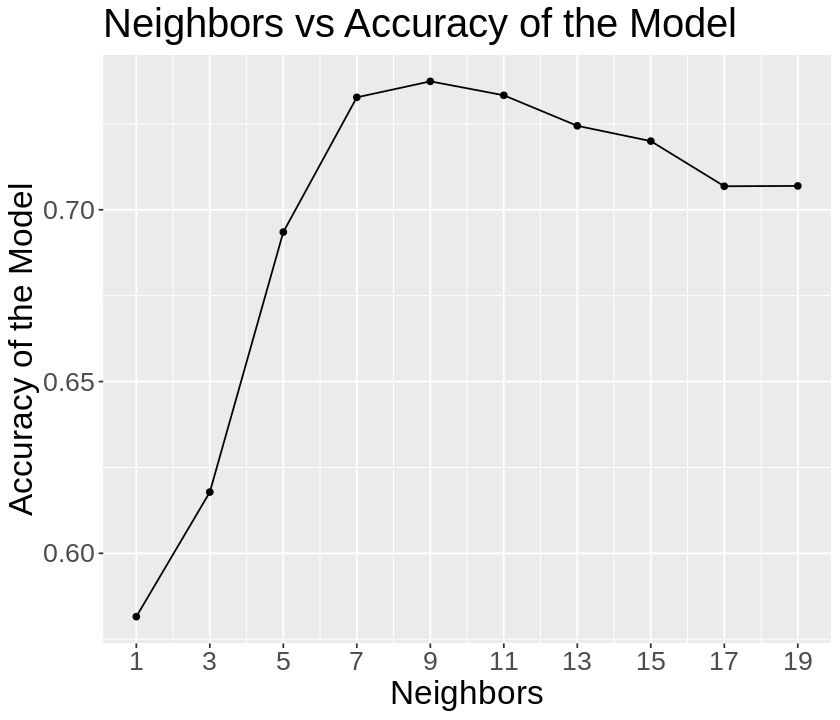

In [17]:
set.seed(2019)

heart_recipe_3<- recipe(diagnosis ~ age + thalach, data = heart_train) |>
                     step_scale(all_predictors()) |>
                     step_center(all_predictors())

heart_vfold_3 <- vfold_cv(heart_train, v = 5, strata = diagnosis)
heart_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 2))


heart_results_3 <- workflow() |>
                      add_recipe(heart_recipe_3) |>
                      add_model(heart_spec) |>
                      tune_grid(resamples = heart_vfold_3, grid = heart_vals) |>
                      collect_metrics()

accuracy_3 <- heart_results_3 |>
                    filter(.metric == "accuracy")

options(repr.plot.width = 7, repr.plot.height = 6)
heart_disease_plot_3 <- accuracy_3 |>
                        ggplot(aes(x = neighbors, y = mean)) +
                        geom_line() +
                        geom_point() +
                        scale_x_continuous(breaks = seq(1, 20, by = 2))+
                        labs(x = "Neighbors", y = "Accuracy of the Model") +
                        ggtitle("Neighbors vs Accuracy of the Model")+
                        theme(text = element_text(size = 20))
heart_disease_plot_3

**Step 2:** Choose the best K and repeat the classification process 


In [26]:
knn_best_spec_3 <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) |>
                       set_engine("kknn") |> 
                       set_mode("classification")

heart_fit_3 <- workflow() |>
                  add_recipe(heart_recipe_3) |>
                  add_model(knn_best_spec_3) |>
                  fit(data = heart_train)

heart_predictions_3 <- predict(heart_fit_3, heart_test) |>
                          bind_cols(heart_test )

head(heart_predictions_3)

heart_accuracy_3 <-  heart_predictions_3|>
                       metrics(truth= diagnosis ,estimate=.pred_class) |>
                       select(.metric,.estimate) |>

head(1)
heart_accuracy_3

heart_conf_mat_3 <- heart_predictions_3 |>
                 conf_mat(truth = diagnosis, estimate=.pred_class)
heart_conf_mat_3

.pred_class thalach chol cp age num diagnosis
1 TRUE        129     229  4  67  1   TRUE     
2 FALSE       168     229  2  48  1   TRUE     
3 TRUE        139     275  3  48  0   FALSE    
4 FALSE       171     266  2  49  0   FALSE    
5 TRUE        132     206  4  60  4   TRUE     
6 TRUE        160     230  4  60  2   TRUE

.metric  .estimate
1 accuracy 0.7307692

          Truth
Prediction FALSE TRUE
     FALSE    31   10
     TRUE     11   26

**Model 4**

**Step 1:** The last model looks at age and chest pain type.

In [19]:
set.seed(2019)

heart_recipe_4 <- recipe(diagnosis ~ age + cp, data = heart_train) |>
                     step_scale(all_predictors()) |>
                     step_center(all_predictors())

heart_vfold_4 <- vfold_cv(heart_train, v = 5, strata = diagnosis)
heart_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 2))


heart_results_4 <- workflow() |>
                      add_recipe(heart_recipe_4) |>
                      add_model(heart_spec) |>
                      tune_grid(resamples = heart_vfold_4, grid = heart_vals) |>
                      collect_metrics()

accuracy_4 <- heart_results_4 |>
                    filter(.metric == "accuracy")

options(repr.plot.width = 7, repr.plot.height = 6)
heart_disease_plot_4 <- accuracy_4 |>
                        ggplot(aes(x = neighbors, y = mean)) +
                        geom_line() +
                        geom_point() +
                        scale_x_continuous(breaks = seq(1, 20, by = 2))+
                        labs(x = "Neighbors", y = "Accuracy of the Model") +
                        ggtitle("Neighbors vs Accuracy of the Model")+
                        theme(text = element_text(size = 20))
heart_disease_plot_4

**Step 2:** Choose the best K and repeat the classification process 


In [27]:
knn_best_spec_4 <- nearest_neighbor(weight_func = "rectangular", neighbors = 19) |>
                       set_engine("kknn") |> 
                       set_mode("classification")

heart_fit_4 <- workflow() |>
                  add_recipe(heart_recipe_4) |>
                  add_model(knn_best_spec_4) |>
                  fit(data = heart_train)

heart_predictions_4 <- predict(heart_fit_4, heart_test) |>
                          bind_cols(heart_test)

head(heart_predictions_4)

heart_accuracy_4 <-  heart_predictions_4|>
                       metrics(truth = diagnosis ,estimate = .pred_class) |>
                       select(.metric,.estimate) |>

head(1)
heart_accuracy_4

heart_conf_mat_4 <- heart_predictions_4 |>
                 conf_mat(truth = diagnosis, estimate=.pred_class)
heart_conf_mat_4

.pred_class thalach chol cp age num diagnosis
1 TRUE        129     229  4  67  1   TRUE     
2 FALSE       168     229  2  48  1   TRUE     
3 FALSE       139     275  3  48  0   FALSE    
4 FALSE       171     266  2  49  0   FALSE    
5 TRUE        132     206  4  60  4   TRUE     
6 TRUE        160     230  4  60  2   TRUE

.metric  .estimate
1 accuracy 0.7435897

          Truth
Prediction FALSE TRUE
     FALSE    32   10
     TRUE     10   26

**Examining results using visualization**

The following code shows a bar graph that compares the three subset predictors model's accuracy, which there is a visible increase in accuracy, showing chest pain type as the most effective in predicting diagnosis.

In [21]:
heart_accuracy_2 <-  heart_accuracy_2 |> mutate(model = "Model 2")
heart_accuracy_3 <- heart_accuracy_3 |> mutate(model = "Model 3")
heart_accuracy_4 <- heart_accuracy_4|> mutate(model = "Model 4")

In [22]:
comparison_table <- rbind(heart_accuracy_4, heart_accuracy_2, heart_accuracy_3) |>
                    mutate(metric = .metric,
                           estimate = round((100 * .estimate), 3)) |>
                    select(model:estimate)
comparison_table

model   metric   estimate
1 Model 4 accuracy 74.359  
2 Model 2 accuracy 58.974  
3 Model 3 accuracy 73.077

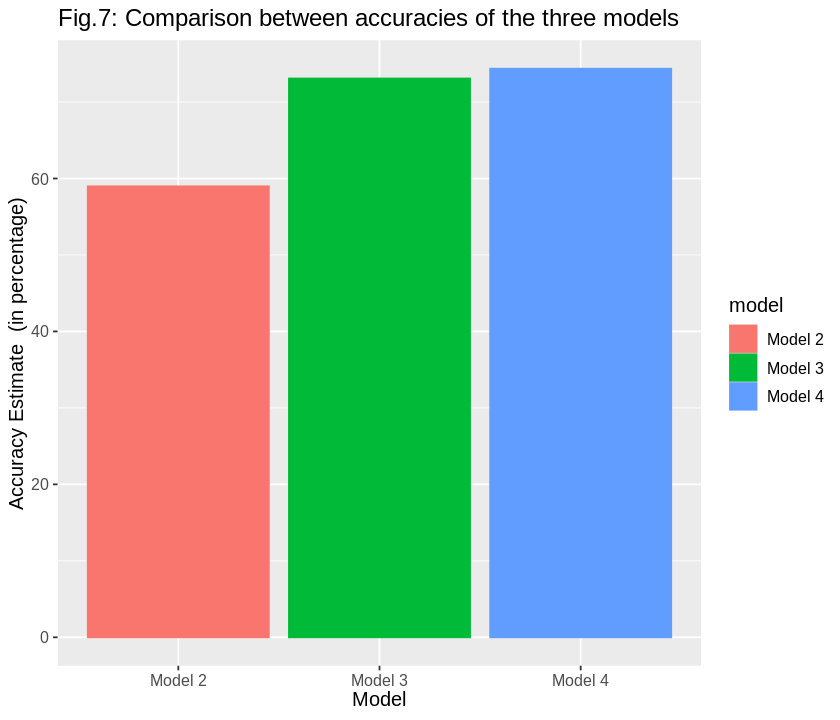

In [23]:
comparison_plot <- ggplot(comparison_table, aes(x = model, y = estimate, color = model, fill = model)) +
                   geom_bar(stat = "identity") +
                   theme(text=element_text(size = 12)) +
                   labs(x = "Model", y = "Accuracy Estimate  (in percentage)")+
                   ggtitle("Fig.7: Comparison between accuracies of the three models")

comparison_plot

**Results**

Overall, based on our analysis, we have yiedled the statistical results of an accuracy around 92%, which indicate a relatively strong model of that correctly identifies both positive and negative diagnosis for 92% of the time . Particularly, our recall value is perfect for this set of data, yeilding the result of 100%, meaning that the model correctly identifies all positive cases.

Moreover, the precision value is 87.5%, suggesting that even though the model is capable of classifying the positive cases all the time, however there are occasions of false positives, which means the model mis-identify the negative case as positive.

Based on our findings, chest pain type emerges as the most strongest indicator for diagnosing heart disease, surpassing both cholesterol levels and blood pressure. This conclusion is drawn from the analysis of our bar graph depicting the accuracy of three subset predictors models. The graph clearly illustrates a notable increase in accuracy, with chest pain type demonstrating the highest effectiveness in predicting diagnosis, achieving a correlation of 74.4% accuracy with the k-nearest neighbors algorithm. While we initially anticipated that both cholesterol levels and blood pressure, along with chest pain, would serve as significant indicators for heart disease, we did not know which one would be stronger. However, it's important to note that while chest pain type is indeed strong indicator, it should not be solely relied upon or considered as the only one. 

**Discussion**

In summary, the k-neighboring model is 

discuss whether this is what you expected to find?


discuss what impact could such findings have?


discuss what future questions could this lead to?

**References**

June, Eugene et al. (2022). Serum Cholesterol Levels and Risk of Cardiovascular Death: A Systematic Review and a Dose-Response Meta-Analysis of Prospective Cohort Studies. National Library of Medicine, 19(14), 1 - 12. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9316578/ 

Lim, C,Y., Teo, G,S., Poh, K, K. (2016). ST-segment changes with exercise stress, 57(7), 347-353. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4958709/

Rodgers, L, Jennifer et al. (2019). Cardiovascular Risks Associated with Gender and Aging. National Library of Medicine, 6(2), 1- 19. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6616540/ 